<a href="https://colab.research.google.com/github/jbenasuli/final_project/blob/alexa-branch/Amazon_Database_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
# Find the latest version of spark 2.0  from http://www-us.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.0'
spark_version = 'spark-3.1.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www-us.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backpor

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("BigData-Challenge").config("spark.driver.extraClassPath","/content/postgresql-42.2.16.jar").getOrCreate()

In [ ]:
#1 Selected furniture data
from pyspark import SparkFiles
url = "https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Furniture_v1_00.tsv.gz"
spark.sparkContext.addFile(url)
df_furniture = spark.read.option("encoding", "UTF-8").csv(SparkFiles.get(""), sep="\t", header=True, inferSchema=True)
df_furniture.show()
print((df_furniture.count(), len(df_furniture.columns)))

+-----------+-----------+--------------+----------+--------------+--------------------+----------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+
|marketplace|customer_id|     review_id|product_id|product_parent|       product_title|product_category|star_rating|helpful_votes|total_votes|vine|verified_purchase|     review_headline|         review_body|review_date|
+-----------+-----------+--------------+----------+--------------+--------------------+----------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+
|         US|   24509695|R3VR960AHLFKDV|B004HB5E0E|     488241329|Shoal Creek Compu...|       Furniture|          4|            0|          0|   N|                Y|... desk is very ...|This desk is very...| 2015-08-31|
|         US|   34731776|R16LGVMFKIUT0G|B0042TNMMS|     205864445|Dorel Home Produc...|       Furniture|          5|    

In [ ]:
#2 Selected personal care applianaces
url = "https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv.gz"
spark.sparkContext.addFile(url)
df_personal_care = spark.read.option("encoding", "UTF-8").csv(SparkFiles.get(""), sep="\t", header=True, inferSchema=True)
print((df_personal_care.count(), len(df_personal_care.columns)))

(878094, 15)


In [ ]:
#3 Selected office products
url = "https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Office_Products_v1_00.tsv.gz"
spark.sparkContext.addFile(url)
df_office = spark.read.option("encoding", "UTF-8").csv(SparkFiles.get(""), sep="\t", header=True, inferSchema=True)
print((df_office.count(), len(df_office.columns)))

(3520528, 15)


In [ ]:
#4 Selected apparel products
url = "https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Apparel_v1_00.tsv.gz"
spark.sparkContext.addFile(url)
df_apparel = spark.read.option("encoding", "UTF-8").csv(SparkFiles.get(""), sep="\t", header=True, inferSchema=True)
print((df_apparel.count(), len(df_apparel.columns)))

(9426861, 15)


In [ ]:
#5 Selected home products
url = "https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Home_v1_00.tsv.gz"
spark.sparkContext.addFile(url)
df_home = spark.read.option("encoding", "UTF-8").csv(SparkFiles.get(""), sep="\t", header=True, inferSchema=True)
print((df_home.count(), len(df_home.columns)))

(15648420, 15)


In [ ]:
#6 Merge databases
from functools import reduce  # For Python 3.x
from pyspark.sql import DataFrame

def unionAll(*dfs):
    return reduce(DataFrame.unionAll, dfs)

df_merge = unionAll(df_furniture, df_personal_care, df_office, df_apparel, df_home)
df_merge.show()

print((df_merge.count(), len(df_merge.columns)))

+-----------+-----------+--------------+----------+--------------+--------------------+----------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+
|marketplace|customer_id|     review_id|product_id|product_parent|       product_title|product_category|star_rating|helpful_votes|total_votes|vine|verified_purchase|     review_headline|         review_body|review_date|
+-----------+-----------+--------------+----------+--------------+--------------------+----------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+
|         US|   24509695|R3VR960AHLFKDV|B004HB5E0E|     488241329|Shoal Creek Compu...|       Furniture|          4|            0|          0|   N|                Y|... desk is very ...|This desk is very...| 2015-08-31|
|         US|   34731776|R16LGVMFKIUT0G|B0042TNMMS|     205864445|Dorel Home Produc...|       Furniture|          5|    

In [ ]:
#7 Only considering verified purchases
df_merge = df_merge.filter(df_merge.verified_purchase == "Y")

In [ ]:
#8 Drop the non-beneficial columns
columns_to_drop = ["marketplace","review_id","product_parent","star_rating","helpful_votes","total_votes","vine","review_headline","review_body","verified_purchase"]

df_merge = df_merge.drop(*columns_to_drop)
df_merge.show()

print((df_merge.count(), len(df_merge.columns)))

+-----------+----------+--------------------+----------------+-----------+
|customer_id|product_id|       product_title|product_category|review_date|
+-----------+----------+--------------------+----------------+-----------+
|   24509695|B004HB5E0E|Shoal Creek Compu...|       Furniture| 2015-08-31|
|   34731776|B0042TNMMS|Dorel Home Produc...|       Furniture| 2015-08-31|
|    1272331|B0030MPBZ4|Bathroom Vanity T...|       Furniture| 2015-08-31|
|   45284262|B005G02ESA|Sleep Master Ulti...|       Furniture| 2015-08-31|
|   18311821|B00AVUQQGQ|Serta Bonded Leat...|       Furniture| 2015-08-31|
|   42943632|B00CFY20GQ|Prepac Shoe Stora...|       Furniture| 2015-08-31|
|   43157304|B00FKC48QA|HomCom PU Leather...|       Furniture| 2015-08-31|
|   51918480|B00N9IAL9K|  Folding Step Stool|       Furniture| 2015-08-31|
|   14522766|B001T4XU1C|Ace Bayou Adult V...|       Furniture| 2015-08-31|
|   43054112|B002HRFLBC|4D Concepts Audio...|       Furniture| 2015-08-31|
|   26622950|B006MISZOC|Z

In [ ]:
#9 Get datatypes
df_merge.printSchema()

root
 |-- customer_id: integer (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_title: string (nullable = true)
 |-- product_category: string (nullable = true)
 |-- review_date: string (nullable = true)



In [ ]:
#10 Convert date from string to datetime
from pyspark.sql.types import *
df_merge = df_merge.withColumn("review_date", df_merge["review_date"].cast(DateType()))

df_merge.printSchema()
df_merge.show()

root
 |-- customer_id: integer (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_title: string (nullable = true)
 |-- product_category: string (nullable = true)
 |-- review_date: date (nullable = true)

+-----------+----------+--------------------+----------------+-----------+
|customer_id|product_id|       product_title|product_category|review_date|
+-----------+----------+--------------------+----------------+-----------+
|   24509695|B004HB5E0E|Shoal Creek Compu...|       Furniture| 2015-08-31|
|   34731776|B0042TNMMS|Dorel Home Produc...|       Furniture| 2015-08-31|
|    1272331|B0030MPBZ4|Bathroom Vanity T...|       Furniture| 2015-08-31|
|   45284262|B005G02ESA|Sleep Master Ulti...|       Furniture| 2015-08-31|
|   18311821|B00AVUQQGQ|Serta Bonded Leat...|       Furniture| 2015-08-31|
|   42943632|B00CFY20GQ|Prepac Shoe Stora...|       Furniture| 2015-08-31|
|   43157304|B00FKC48QA|HomCom PU Leather...|       Furniture| 2015-08-31|
|   51918480|B00N9IAL9K|

In [ ]:
#10 Create column with year
from pyspark.sql.functions import year
from pyspark.sql.functions import to_date
 
df_merge = df_merge.withColumn("review_year",year(df_merge.review_date))
df_merge.show()

+-----------+----------+--------------------+----------------+-----------+-----------+
|customer_id|product_id|       product_title|product_category|review_date|review_year|
+-----------+----------+--------------------+----------------+-----------+-----------+
|   24509695|B004HB5E0E|Shoal Creek Compu...|       Furniture| 2015-08-31|       2015|
|   34731776|B0042TNMMS|Dorel Home Produc...|       Furniture| 2015-08-31|       2015|
|    1272331|B0030MPBZ4|Bathroom Vanity T...|       Furniture| 2015-08-31|       2015|
|   45284262|B005G02ESA|Sleep Master Ulti...|       Furniture| 2015-08-31|       2015|
|   18311821|B00AVUQQGQ|Serta Bonded Leat...|       Furniture| 2015-08-31|       2015|
|   42943632|B00CFY20GQ|Prepac Shoe Stora...|       Furniture| 2015-08-31|       2015|
|   43157304|B00FKC48QA|HomCom PU Leather...|       Furniture| 2015-08-31|       2015|
|   51918480|B00N9IAL9K|  Folding Step Stool|       Furniture| 2015-08-31|       2015|
|   14522766|B001T4XU1C|Ace Bayou Adult V..

In [ ]:
#11 Create a table to count data rows per year
row_year_table = df_merge.groupby("review_year").agg({"review_year":"count"}).withColumnRenamed("count(review_year)", "year_count")
row_year_table.sort(row_year_table.review_year.desc()).show(truncate=False)

+-----------+----------+
|review_year|year_count|
+-----------+----------+
|2015       |10159789  |
|2014       |8613535   |
|2013       |4717096   |
|2012       |1616030   |
|2011       |808013    |
|2010       |442625    |
|2009       |198524    |
|2008       |103916    |
|2007       |77769     |
|2006       |20737     |
|2005       |10626     |
|2004       |5216      |
|2003       |5299      |
|2002       |3468      |
|2001       |2736      |
|2000       |1462      |
|1999       |123       |
|null       |0         |
+-----------+----------+



In [ ]:
#12 Only considering 2010 data for week 1
df_merge = df_merge.filter(df_merge.review_year == "2010")
print((df_merge.count(), len(df_merge.columns)))

(442625, 6)


In [ ]:
#13 Create table with customer_IDs and products bought (as  row)
# This method didn't work, there's a limit of 10,000 distinct values in pyspark

# summary_table = df_merge.groupby("customer_id").pivot("product_id").count()
# summary_table.show()

In [ ]:
#14 Convert Pyspark dataframe into panda df
df_week1 = df_merge.toPandas()

In [ ]:
#15 Save file in my drive
from google.colab import drive
drive.mount('drive')

df_week1.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

KeyboardInterrupt: ignored

In [ ]:
df_week1["Quantity"] = 1
df_week1

,customer_id,product_id,product_title,product_category,review_date,review_year,Quantity
0,13682848,B001GRNO68,ORE International Black 4 Panel Plum Blossom S...,Furniture,2010-12-31,2010,1
1,52516035,B003QCJHMQ,"Winsome Wood Portland Umbrella Stand, Cappuccina",Furniture,2010-12-31,2010,1
2,19360779,B0012LYSG8,Tenley Occasional Table Set,Furniture,2010-12-31,2010,1
3,11362249,B000IHJF60,Tot Tutors WO697 Friends Collection Kids Book ...,Furniture,2010-12-31,2010,1
4,40561072,B001NMSD9Y,ITALMODERN Veronica Monitor Cart; Orange,Furniture,2010-12-31,2010,1
...,...,...,...,...,...,...,...
442620,14371548,B000LSUW6S,Braun Oral-B Sonic Complete Replacement Brushe...,Personal_Care_Appliances,2010-01-01,2010,1
442621,14812612,B001BYYCHQ,Walker or Wheelchair Bag,Personal_Care_Appliances,2010-01-01,2010,1
442622,13572974,B0013RQP08,Exergen temporal thermometer,Personal_Care_Appliances,2010-01-01,2010,1
442623,14395064,B001AHM29Y,Snore Stopper - Self-Adhesive Electrodes (1 pa...,Personal_Care_Appliances,2010-01-01,2010,1


In [ ]:
#17 Too many products to create table
product_counts = df_week1.product_id.value_counts()
product_counts

B002GP7Z6Y    1242
B002O3W4LE     870
B0032AN4M6     780
B001VD5E3S     606
B001R4C5BK     591
              ... 
B0007UQLG0       1
B0014290RW       1
B0012FHRPI       1
B000V9H7T2       1
B000VEB7SE       1
Name: product_id, Length: 108486, dtype: int64

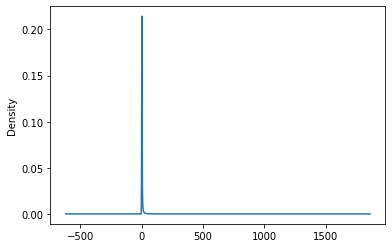

In [ ]:
#18 Visualize the value counts
product_counts.plot.density()

In [ ]:
#19 Determine which values to replace
replace_product = list(product_counts[product_counts < 50].index)

# Replace in DataFrame
for product in replace_product:
    df_week1.product_id = df_week1.product_id.replace(product,"Other")

# Check to make sure binning was successful
df_week1.product_id.value_counts()

Other         367366
B002GP7Z6Y      1242
B002O3W4LE       870
B0032AN4M6       780
B001VD5E3S       606
               ...  
B000BDGAA0        50
B000GLNO3S        50
B001KW0BPQ        50
B002XUKWX0        50
B001E95R1S        50
Name: product_id, Length: 699, dtype: int64

In [ ]:
#20 Drop rows of product_ids where total count is lower than 50
df_simplified = df_week1[df_week1.product_id != "Other"]
df_simplified

,customer_id,product_id,product_title,product_category,review_date,review_year,Quantity
3,11362249,B000IHJF60,Tot Tutors WO697 Friends Collection Kids Book ...,Furniture,2010-12-31,2010,1
11,45402464,B001AX898G,Homz Square-Shaped Faux-Leather Storage Ottoman,Furniture,2010-12-31,2010,1
12,20255829,B002YD8E5O,Convenience Concepts Sheridan Faux Leather Sto...,Furniture,2010-12-31,2010,1
14,53086796,B001T4XTVS,Ace Bayou Medium Standard Vinyl Bean Bag Chair,Furniture,2010-12-31,2010,1
27,30620418,B000QS5PEW,CARVED-TOP ACCENT TABLE,Furniture,2010-12-31,2010,1
...,...,...,...,...,...,...,...
442587,45455621,B0025RDKA8,"Nonin Go2 Achieve Fingertip Pulse Oximeter, Blue",Personal_Care_Appliances,2010-01-05,2010,1
442592,32396682,B000F9728Y,Tingting Head Tuner,Personal_Care_Appliances,2010-01-05,2010,1
442594,26776628,B001AHMN34,Sunlight 365 LED Mood Enhancing Light,Personal_Care_Appliances,2010-01-04,2010,1
442613,37373357,B0010DS8X2,Oral-B Professional Care 3000 Electric Power T...,Personal_Care_Appliances,2010-01-02,2010,1


In [ ]:
#21 Consolidate the items into 1 transaction per row with each product
apriori_table = df_simplified.groupby(["customer_id","product_id"])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("customer_id")
apriori_table

product_id,B00000JZKB,B00000K13A,B00001N2QU,B00004T1XK,B00004Z5QI,B000050FZP,B00005ATSO,B00005AWBJ,B00005UKAX,B0000635WI,B000067PTO,B00006B80P,B00006B8HT,B00006I58N,B00006ICZB,B00006IEDY,B00006IEI2,B00006IEI4,B00006IV33,B00006L385,B00007AKDL,B00007M1TZ,B00008UI0R,B00008XETL,B000090WE9,B00009R66F,B00009RAVO,B00009V332,B00009WCBU,B0000APHTD,B0000C120T,B0000CBK1L,B0000DF0RB,B0000UIXRM,B0000VYDKM,B0000YS93Q,B00016BYHQ,B0001EMLZ2,B0001EMLZW,B0001EMM0G,...,B0036TGGJ6,B0036TGGJG,B0036TGGVO,B0036TGGW8,B0037JK1V4,B00387E5BM,B0038FWRXC,B003990GMQ,B0039XRJ5Y,B0039XRJ68,B003A0H38E,B003ADACP2,B003B42ZBE,B003BNY7PM,B003CYKBAU,B003E1S2K2,B003EK7O1G,B003G2OVCC,B003GUTG06,B003H92LSA,B003I4FC80,B003JME93K,B003JQLHEA,B003JYGBCK,B003KGBCZS,B003L4O8D2,B003SHZ27S,B003UBPB6E,B003UFEGW0,B003UI5B8A,B003VQHQ8E,B003VQHSJG,B003VQR1RA,B003VQR1S4,B003VQR1UC,B003WE8TRC,B003WL7R6Y,B003YCOJAS,B003YHD1FW,B003YL412U
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9873698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9874628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9875027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9875419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9877002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53095559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53095900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53096155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#22 Save file in my drive
from google.colab import  drive
drive.mount('/drive', force_remount=True)
apriori_table.to_csv('/drive/My Drive/Apriori/apriori_table.csv')

#drive.mount("drive", force_remount=True)
#apriori_table.to_csv('apriori_table.csv')
#!cp data.csv "drive/My Drive/"

In [ ]:
#23 Importing apriori dependencies

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [ ]:
#24 Cleaning Apriori table to remove unnecessary 0's.

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
apriori_cleaned = apriori_table.applymap(encode_units)
apriori_cleaned

product_id,B00000JZKB,B00000K13A,B00001N2QU,B00004T1XK,B00004Z5QI,B000050FZP,B00005ATSO,B00005AWBJ,B00005UKAX,B0000635WI,B000067PTO,B00006B80P,B00006B8HT,B00006I58N,B00006ICZB,B00006IEDY,B00006IEI2,B00006IEI4,B00006IV33,B00006L385,B00007AKDL,B00007M1TZ,B00008UI0R,B00008XETL,B000090WE9,B00009R66F,B00009RAVO,B00009V332,B00009WCBU,B0000APHTD,B0000C120T,B0000CBK1L,B0000DF0RB,B0000UIXRM,B0000VYDKM,B0000YS93Q,B00016BYHQ,B0001EMLZ2,B0001EMLZW,B0001EMM0G,...,B0036TGGJ6,B0036TGGJG,B0036TGGVO,B0036TGGW8,B0037JK1V4,B00387E5BM,B0038FWRXC,B003990GMQ,B0039XRJ5Y,B0039XRJ68,B003A0H38E,B003ADACP2,B003B42ZBE,B003BNY7PM,B003CYKBAU,B003E1S2K2,B003EK7O1G,B003G2OVCC,B003GUTG06,B003H92LSA,B003I4FC80,B003JME93K,B003JQLHEA,B003JYGBCK,B003KGBCZS,B003L4O8D2,B003SHZ27S,B003UBPB6E,B003UFEGW0,B003UI5B8A,B003VQHQ8E,B003VQHSJG,B003VQR1RA,B003VQR1S4,B003VQR1UC,B003WE8TRC,B003WL7R6Y,B003YCOJAS,B003YHD1FW,B003YL412U
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9873698,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9874628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9875027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9875419,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9877002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53095559,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53095900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53096155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#25 Running apriori algorithm on cleaned dataset. 

item_association = apriori(apriori_cleaned, min_support=0.0001, use_colnames=True)
item_association

,support,itemsets
0,0.001053,(B00000JZKB)
1,0.000632,(B00000K13A)
2,0.001650,(B00001N2QU)
3,0.000632,(B00004T1XK)
4,0.000808,(B00004Z5QI)
...,...,...
717,0.000140,"(B002TSAE5C, B002TSAE70)"
718,0.000105,"(B002TSAE70, B002TSAE8O)"
719,0.000176,"(B002TSAE9I, B002TSAE70)"
720,0.000281,"(B002TSAE9I, B002TSAE8O)"


In [ ]:
#26 Apriori association results table and confidence levels. 

apriori_rules = association_rules(item_association, metric="lift", min_threshold=1)
apriori_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(B00006I58N),(B000WB397I),0.001124,0.003336,0.000105,0.093750,28.103289,0.000102,1.099767
1,(B000WB397I),(B00006I58N),0.003336,0.001124,0.000105,0.031579,28.103289,0.000102,1.031448
2,(B00007M1TZ),(B000090WE9),0.005337,0.000913,0.000140,0.026316,28.823887,0.000136,1.026089
3,(B000090WE9),(B00007M1TZ),0.000913,0.005337,0.000140,0.153846,28.823887,0.000136,1.175510
4,(B00007M1TZ),(B001P80ESO),0.005337,0.004249,0.000105,0.019737,4.645172,0.000083,1.015800
5,(B001P80ESO),(B00007M1TZ),0.004249,0.005337,0.000105,0.024793,4.645172,0.000083,1.019951
6,(B000BUWNH2),(B000BV0AYY),0.001264,0.000878,0.000176,0.138889,158.211111,0.000174,1.160271
7,(B000BV0AYY),(B000BUWNH2),0.000878,0.001264,0.000176,0.200000,158.211111,0.000174,1.248420
8,(B000HZGQCY),(B000HRZ7AY),0.000948,0.001334,0.000281,0.296296,222.050682,0.000280,1.419156
9,(B000HRZ7AY),(B000HZGQCY),0.001334,0.000948,0.000281,0.210526,222.050682,0.000280,1.265466


In [ ]:
#27 Sorting Apriori in descending order by confidence levels.

apriori_sorted = apriori_rules.sort_values(["confidence"], ascending=False)
apriori_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
48,"(B002TSAE70, B002TSAE8O)",(B002TSAE9I),0.000105,0.000562,0.000105,1.000000,1779.875000,0.000105,inf
46,"(B002TSAE9I, B002TSAE70)",(B002TSAE8O),0.000176,0.001334,0.000105,0.600000,449.652632,0.000105,2.496664
44,(B002TSAE9I),(B002TSAE8O),0.000562,0.001334,0.000281,0.500000,374.710526,0.000280,1.997331
47,"(B002TSAE9I, B002TSAE8O)",(B002TSAE70),0.000281,0.000527,0.000105,0.375000,711.950000,0.000105,1.599157
24,(B001CSMJKI),(B001CSMJKS),0.001615,0.002950,0.000597,0.369565,125.291408,0.000592,1.581528
43,(B002TSAE70),(B002TSAE9I),0.000527,0.000562,0.000176,0.333333,593.291667,0.000175,1.499157
42,(B002TSAE9I),(B002TSAE70),0.000562,0.000527,0.000176,0.312500,593.291667,0.000175,1.453779
8,(B000HZGQCY),(B000HRZ7AY),0.000948,0.001334,0.000281,0.296296,222.050682,0.000280,1.419156
38,(B002TSAE5C),(B002TSAE70),0.000527,0.000527,0.000140,0.266667,506.275556,0.000140,1.362918
39,(B002TSAE70),(B002TSAE5C),0.000527,0.000527,0.000140,0.266667,506.275556,0.000140,1.362918
